# Final Capstone Assignment - Neighborhood comparison 
# between 2 cities with 2 specific addresses - relevant for a move


In [1]:
##  Import relevant libraries

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
##pd.set_option('display.max_columns', None)
##pd.set_option('display.max_rows', None)

import json # library to handle JSON files

print('Libraries numpy & pandas imported.')

Libraries numpy & pandas imported.


In [2]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
print('Libraries geopy imported.')


Libraries geopy imported.


In [3]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
print('Libraries requests imported.')



Libraries requests imported.


In [4]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries matplotlib & sklearn imported.')

Libraries matplotlib & sklearn imported.


In [5]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries folium imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [6]:
# Get data reflecting the monthly rentals per square meter for new city. Here a google search for respective data will be necessary
# when using this code for a  new city to city comparison

In [7]:
# scrape the website https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M,

list = pd.read_html("https://de.statista.com/statistik/daten/studie/260438/umfrage/mietpreise-in-muenchen-nach-bezirken/")

In [8]:
df = pd.DataFrame(list[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
Unnamed: 0                  28 non-null object
Mietpreis in Euro pro m²    28 non-null int64
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [9]:
# data cleansing of rental data 

df_district = df

# Data Cleaning
df_district.rename(columns={'Unnamed: 0':'District'}, inplace=True)
df_district.rename(columns={ df_district.columns[1]: "Rental" }, inplace=True)
print(df_district.shape)
df_district.head()

(28, 2)


,District,Rental
0,Altstadt-Lehel,2265
1,Maxvorstadt,2154
2,Ludwigsvorstadt-Isarvorstadt,2066
3,"Schwabing, Schwabing-West",2047
4,Au-Haidhausen,1893


In [10]:
# when scraping the website, the last zero gets dropped when reading into list. This is to rectify this problem
# Also adding Latitude & Longitude to df and creating a new column for rental price in euro as float with decimals
df_district["Latitude"] = ""
df_district["Longitude"] = ""
df_district["Euro"] = 0.0
for ind in df_district.index:
    if df_district['Rental'][ind] < 1001:
        df_district['Rental'][ind] = df_district['Rental'][ind]*10
    df_district["Euro"][ind] = float(df_district['Rental'][ind]/100)

# add latitude and longitude columns to dataframe

df_district.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,District,Rental,Latitude,Longitude,Euro
0,Altstadt-Lehel,2265,,,22.65
1,Maxvorstadt,2154,,,21.54
2,Ludwigsvorstadt-Isarvorstadt,2066,,,20.66
3,"Schwabing, Schwabing-West",2047,,,20.47
4,Au-Haidhausen,1893,,,18.93


In [11]:
# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#clean up one district name that was not compatible with geopy
df_district['District'][6] = 'Milbertshofen'

#Get the geographical coordinates (Latitude/Longitude)

city = ', Munich , Germany'
for ind in df_district.index:
    address = df_district['District'][ind] + city
    geolocator = Nominatim(user_agent="Munich_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    df_district['Latitude'][ind] = latitude
    df_district['Longitude'][ind] = longitude

print('The geograpical coordinates of districts in Munich  have been added to the table.')

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The geograpical coordinates of districts in Munich  have been added to the table.


In [12]:
# defining old and new address - old address will be needed later
old_address = 'Schwedterstrasse 23, Berlin , Germany'
new_address = 'Waltherstrasse 26, Munich , Germany'

In [13]:
# get lat and long for old and new address
geolocator = Nominatim(user_agent="Munich_explorer")
location = geolocator.geocode(old_address)
old_latitude = location.latitude
old_longitude = location.longitude
print (old_address, old_longitude, old_latitude)
geolocator = Nominatim(user_agent="Munich_explorer")
location = geolocator.geocode(new_address)
new_latitude = location.latitude
new_longitude = location.longitude
print (new_address, new_longitude, new_latitude)

Schwedterstrasse 23, Berlin , Germany 13.4093203 52.4040122
Waltherstrasse 26, Munich , Germany 11.560293460361693 48.1290491


In [14]:
# Binning to create 3 categories for rental prices per square meter
bins = np.linspace(min(df_district["Rental"]), max(df_district["Rental"]),4)
group_names=["low", "medium","high"]
df_district["rental_bin"] = pd.cut(df_district["Rental"], bins, labels = group_names,include_lowest = True)
df_district.head()


,District,Rental,Latitude,Longitude,Euro,rental_bin
0,Altstadt-Lehel,2265,48.1378,11.5746,22.65,high
1,Maxvorstadt,2154,48.1466,11.5714,21.54,high
2,Ludwigsvorstadt-Isarvorstadt,2066,48.1318,11.5558,20.66,high
3,"Schwabing, Schwabing-West",2047,48.1599,11.5762,20.47,high
4,Au-Haidhausen,1893,48.1288,11.5905,18.93,medium


In [15]:
#Create map of the munich districts using latitude and longitude values

map_Munich = folium.Map(location=[new_latitude, new_longitude], zoom_start=12)

#create plots on map   
for lat, lng, neighborhood, grp, cents in zip(df_district['Latitude'][0:27], df_district['Longitude'][0:27], df_district['District'][0:27], df_district['rental_bin'][0:27], df_district['Rental'][0:27]):
    euro = float(cents/100)  
    neighborhood_price=neighborhood + ' ' + str(euro)
    label = '{}'.format(neighborhood_price)
    label = folium.Popup(label, parse_html=True)
    
#  #Seperate colours for the 3 categories of high, medium and low rentals
    if grp == "high":
        grpcolor =  'red'
        fillcol = 'red'
    elif grp == "medium":
         grpcolor =  'yellow' 
         fillcol = 'yellow'   
    elif grp == "low":
        grpcolor = 'green'
        fillcol = 'green'
    else: 
        grpcolor = 'black'
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color=grpcolor,
        fill=True,
        fill_color = fillcol,
 #       fill_color='#FF0000',
        fill_opacity=1,
        parse_html=False).add_to(map_Munich) 

    

In [16]:
# add pin for new home location
label = '{}'.format('New Home')
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
   [new_latitude,new_longitude],
    radius=6,
    popup=label,
    color='black',
    fill=True,
    fill_color='White',
    fill_opacity=1,
    parse_html=False).add_to(map_Munich) 


In [17]:
map_Munich

In [18]:
df_chart=''
df_chart = df_district.copy()
df_chart.set_index('District', inplace=True, drop=True)
#df_chart.drop(['index'], axis=1, inplace=True )
df_chart.head()


,Rental,Latitude,Longitude,Euro,rental_bin
District,,,,,
Altstadt-Lehel,2265,48.1378,11.5746,22.65,high
Maxvorstadt,2154,48.1466,11.5714,21.54,high
Ludwigsvorstadt-Isarvorstadt,2066,48.1318,11.5558,20.66,high
"Schwabing, Schwabing-West",2047,48.1599,11.5762,20.47,high
Au-Haidhausen,1893,48.1288,11.5905,18.93,medium


In [ ]:
# prepare data for a bar chart sort in alphabetical order of districts

df_chart.drop(['Latitude','Longitude','rental_bin', 'Rental'], axis=1, inplace=True )
df_chart.sort_values(by='Euro', ascending=False, inplace=True)
#df_chart.drop(index=none)
#df_chart.reset_index( inplace=True, drop=True)
df_chart.head()

,Euro
District,
Altstadt-Lehel,22.65
Maxvorstadt,21.54
Ludwigsvorstadt-Isarvorstadt,20.66
"Schwabing, Schwabing-West",20.47
Au-Haidhausen,18.93


In [ ]:
df_chart.dtypes

Euro    float64
dtype: object

In [ ]:
df_district.dtypes

District        object
Rental           int64
Latitude        object
Longitude       object
Euro           float64
rental_bin    category
dtype: object

In [ ]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

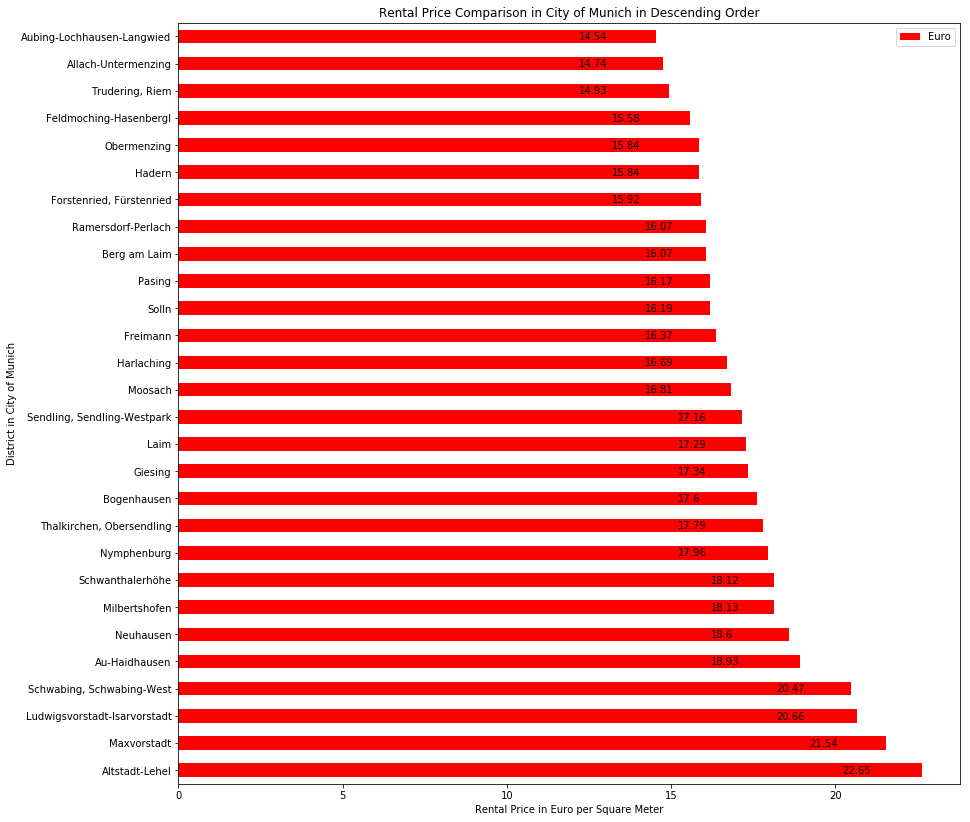

In [ ]:
df_chart.plot(kind='barh', figsize=(14, 14), color='red')
plt.xlabel('Rental Price in Euro per Square Meter')
plt.ylabel('District in City of Munich')
plt.title('Rental Price Comparison in City of Munich in Descending Order')
#
index=-1
for ind in df_chart.index:
    label = str(df_chart['Euro'][ind])
    pos = int(df_chart['Euro'][ind])
    index=index+1
    # print(pos,ind,label)
    # plt.annotate(label, xy=(pos - 47000, ind - 0.10), color='white')
    plt.annotate(label, xy=(pos - 1.8, index - 0.12), color='black')

plt.show()

In [ ]:
df_district.head()

,District,Rental,Latitude,Longitude,Euro,rental_bin
0,Altstadt-Lehel,2265,48.1378,11.5746,22.65,high
1,Maxvorstadt,2154,48.1466,11.5714,21.54,high
2,Ludwigsvorstadt-Isarvorstadt,2066,48.1318,11.5558,20.66,high
3,"Schwabing, Schwabing-West",2047,48.1599,11.5762,20.47,high
4,Au-Haidhausen,1893,48.1288,11.5905,18.93,medium


In [ ]:
# add old home location and new home location to df
df_all_districts = df_district.append({'District' : 'Old Home' ,
                                        'Latitude' : old_latitude,
                                        'Longitude' : old_longitude},
                                     ignore_index=True)                                      


In [ ]:
df_all_districts = df_all_districts.append({'District' : 'New Home' ,
                                        'Latitude' : new_latitude,
                                        'Longitude' : new_longitude} , ignore_index=True)
df_all_districts

,District,Rental,Latitude,Longitude,Euro,rental_bin
0,Altstadt-Lehel,2265.0,48.1378,11.5746,22.65,high
1,Maxvorstadt,2154.0,48.1466,11.5714,21.54,high
2,Ludwigsvorstadt-Isarvorstadt,2066.0,48.1318,11.5558,20.66,high
3,"Schwabing, Schwabing-West",2047.0,48.1599,11.5762,20.47,high
4,Au-Haidhausen,1893.0,48.1288,11.5905,18.93,medium
5,Neuhausen,1860.0,48.1542,11.5315,18.60,medium
6,Milbertshofen,1813.0,48.1824,11.575,18.13,medium
7,Schwanthalerhöhe,1812.0,48.1338,11.5411,18.12,medium
8,Nymphenburg,1796.0,48.1571,11.5097,17.96,medium
9,"Thalkirchen, Obersendling",1779.0,48.1028,11.546,17.79,medium


In [ ]:
#Set up credentials for FourSquare

CLIENT_ID = '5M01F5XNU45N1FR3TFUATU33FX1FLCCDWGGN22NBQ50CYEIF' # your Foursquare ID
CLIENT_SECRET = 'G4UJGAXKC24ZM1DA4GUNLIZVYYYAVJRVDVKZU2ZFHLDMT3S1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5M01F5XNU45N1FR3TFUATU33FX1FLCCDWGGN22NBQ50CYEIF
CLIENT_SECRET:G4UJGAXKC24ZM1DA4GUNLIZVYYYAVJRVDVKZU2ZFHLDMT3S1


In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
def getNearbyVenues(district, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for district, lat, lng in zip(district, latitudes, longitudes):
        print(district)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            district,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)
    

In [ ]:
LIMIT = 150
munich_venues = getNearbyVenues(district=df_all_districts['District'],
                                   latitudes=df_all_districts['Latitude'],
                                   longitudes=df_all_districts['Longitude']
                                  )

Altstadt-Lehel
Maxvorstadt
Ludwigsvorstadt-Isarvorstadt
Schwabing, Schwabing-West
Au-Haidhausen
Neuhausen
Milbertshofen
Schwanthalerhöhe
Nymphenburg
Thalkirchen, Obersendling
Bogenhausen
Giesing
Laim
Sendling, Sendling-Westpark
Moosach
Harlaching
Freimann
Solln
Pasing
Berg am Laim
Ramersdorf-Perlach
Forstenried, Fürstenried
Hadern
Obermenzing
Feldmoching-Hasenbergl
Trudering, Riem
Allach-Untermenzing
Aubing-Lochhausen-Langwied
Old Home
New Home


In [ ]:
#A table clearly showing the venues, venue category, venue latitude and longitude for each neighbourhood
print('Size is {}'.format(munich_venues.shape))
munich_venues.head()

Size is (1294, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Altstadt-Lehel,48.137828,11.574582,Marienplatz,48.137125,11.575483,Plaza
1,Altstadt-Lehel,48.137828,11.574582,Fischbrunnen,48.137211,11.576047,Fountain
2,Altstadt-Lehel,48.137828,11.574582,Alois Dallmayr,48.138554,11.576750,Gourmet Shop
3,Altstadt-Lehel,48.137828,11.574582,St. Peter,48.136530,11.575615,Church
4,Altstadt-Lehel,48.137828,11.574582,Augustiner Klosterwirt,48.138649,11.572527,German Restaurant


In [ ]:
munich_venues_count = munich_venues['District'].value_counts() #type series
mnich_venues_count = munich_venues_count.reset_index() # type dataframe
munich_venues_count.columns = ['District', 'Venue Counts']
print(munich_venues_count.shape)
munich_venues_count.head(30)

(30,)


Au-Haidhausen                   100
Schwabing, Schwabing-West       100
Maxvorstadt                     100
Altstadt-Lehel                  100
New Home                         98
Schwanthalerhöhe                 85
Ludwigsvorstadt-Isarvorstadt     78
Pasing                           67
Neuhausen                        61
Laim                             54
Sendling, Sendling-Westpark      50
Milbertshofen                    49
Thalkirchen, Obersendling        33
Nymphenburg                      32
Giesing                          31
Hadern                           29
Moosach                          29
Berg am Laim                     24
Ramersdorf-Perlach               22
Solln                            20
Trudering, Riem                  18
Obermenzing                      17
Bogenhausen                      16
Forstenried, Fürstenried         15
Aubing-Lochhausen-Langwied       14
Freimann                         14
Feldmoching-Hasenbergl           13
Allach-Untermenzing         

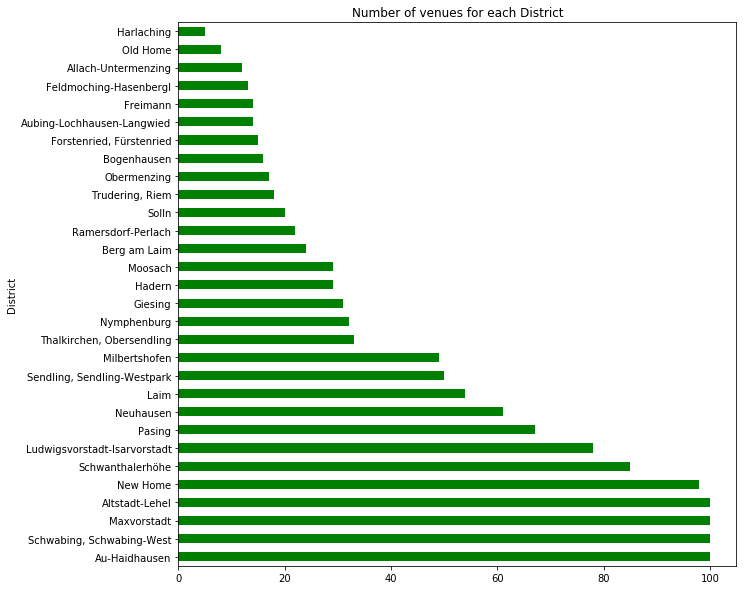

In [ ]:
munich_venues_count.plot(kind='barh', x='District', y='Venue Counts', color = 'green', figsize=(10, 10))
plt.ylabel('District') # add y-label to the plot
plt.title("Number of venues for each District")
plt.show()

Notice there are too many columns and some of them have similar names, e.g., Art Gallery, Art Musuem or 
Beer Bar, Beer Store or Train, Train Station. The grouping of similar columns is done and displayed below.

In [ ]:
print('There are {} uniques categories.'.format(len(munich_venues['Venue Category'].unique())))

There are 198 uniques categories.


In [ ]:
# one hot encoding
munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")
munich_onehot
# add district column back to dataframe
munich_onehot['District'] = munich_venues['District'] 
munich_onehot
# move district column to the first column
munich_onehot = munich_onehot[ ['District'] + [ col for col in munich_onehot.columns if col != 'District' ] ]

munich_grouped = munich_onehot.groupby('District').sum().reset_index()
print('Size is {}'.format(munich_grouped.shape))
munich_grouped.head()

# munich_onehot.head()

Size is (30, 199)


,District,ATM,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Allach-Untermenzing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Altstadt-Lehel,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Au-Haidhausen,0,1,0,0,0,0,2,0,0,...,3,1,1,0,1,0,0,0,0,0
3,Aubing-Lochhausen-Langwied,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Berg am Laim,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# lets try and group by list below to reduce number of categories 

In [ ]:
headers = ["Museum", "Restaurant", "Store", "Shop", "Beer", "Book", "Food", "Garden",  "Gym", "Hotel",  "Pizza", "Bar", "Park", "Club", "Zoo",
              "Station", "Stadium", "Field", "Sport", "Auto", "Bus" ]
for header in headers:
    old_names = [col for col in munich_grouped.columns if header in col]
    new_names = len(old_names)*[header]
    munich_grouped.rename(columns=dict(zip(old_names, new_names)), inplace=True)
    
munich_grouped = munich_grouped.groupby(munich_grouped.columns, axis=1).sum()

munich_grouped = munich_grouped[['District'] + [c for c in munich_grouped if c not in ['District']]]

#København_grouped = København_grouped.loc[:, (København_grouped != 0).any(axis=0)]

print('Size is {}'.format(munich_grouped.shape))
munich_grouped.head()

Size is (30, 98)


,District,ATM,Art Gallery,BBQ Joint,Bakery,Bank,Bar,Beach,Beer,Bistro,...,Store,Supermarket,Taverna,Tea Room,Tennis Court,Theater,Trail,Trattoria/Osteria,Yoga Studio,Zoo
0,Allach-Untermenzing,0,0,0,1,0,0,0,0,0,...,1,2,0,0,1,0,0,1,0,0
1,Altstadt-Lehel,0,0,0,0,0,3,0,1,0,...,11,0,0,0,0,1,0,0,0,0
2,Au-Haidhausen,0,0,0,4,0,5,3,3,2,...,0,0,0,0,0,0,0,1,0,0
3,Aubing-Lochhausen-Langwied,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Berg am Laim,0,0,0,2,1,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0


Selecting this districts we want to focus in in more detail

In [ ]:
top_districts_grouped = munich_grouped.copy()
some_values = ['New Home', 'Old Home', 'Altstadt-Lehel']
top_districts_grouped = munich_grouped.loc[(munich_grouped['District'].isin(some_values))].copy()
print(top_districts_grouped.shape)
top_districts_grouped.head()


(3, 98)


,District,ATM,Art Gallery,BBQ Joint,Bakery,Bank,Bar,Beach,Beer,Bistro,...,Store,Supermarket,Taverna,Tea Room,Tennis Court,Theater,Trail,Trattoria/Osteria,Yoga Studio,Zoo
1,Altstadt-Lehel,0,0,0,0,0,3,0,1,0,...,11,0,0,0,0,1,0,0,0,0
18,New Home,0,1,0,1,0,8,0,1,2,...,4,2,1,0,0,0,0,0,0,0
21,Old Home,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
#select top 15 venues to not overcrowd following illustrations
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
top_munich_venues_sorted = pd.DataFrame(columns=columns)
top_munich_venues_sorted['District'] = top_districts_grouped['District']

for ind in np.arange(top_districts_grouped.shape[0]):
    top_munich_venues_sorted.iloc[ind, 1:] = return_most_common_venues(top_districts_grouped.iloc[ind, :], num_top_venues)

top_munich_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,Altstadt-Lehel,Restaurant,Store,Shop,Café,Plaza,Hotel,Pizza,Church,Bar,Museum,Opera House,Boutique,Fountain,Drugstore,Historic Site
18,New Home,Restaurant,Café,Bar,Store,Shop,Burger Joint,Club,Hotel,Supermarket,Pizza,Bistro,Hostel,Pub,Nightclub,Plaza
21,Old Home,Restaurant,Supermarket,Bus,Gym,Zoo,Food,Deli / Bodega,Drugstore,Event Space,Exhibit,Fair,Farmers Market,Field,Fish Market,Fountain


In [ ]:
top_districts_grouped.reset_index(drop=True, inplace=True)
top_districts_grouped.head()

,District,ATM,Art Gallery,BBQ Joint,Bakery,Bank,Bar,Beach,Beer,Bistro,...,Store,Supermarket,Taverna,Tea Room,Tennis Court,Theater,Trail,Trattoria/Osteria,Yoga Studio,Zoo
0,Altstadt-Lehel,0,0,0,0,0,3,0,1,0,...,11,0,0,0,0,1,0,0,0,0
1,New Home,0,1,0,1,0,8,0,1,2,...,4,2,1,0,0,0,0,0,0,0
2,Old Home,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [ ]:
#remove restaurants so the radar chart is more precise as number of restaurant is high in all 3 districts 

top_minus_restaurant = top_districts_grouped.copy()
top_minus_restaurant.drop(('Restaurant'), axis=1, inplace=True)
top_minus_restaurant.head()

,District,ATM,Art Gallery,BBQ Joint,Bakery,Bank,Bar,Beach,Beer,Bistro,...,Store,Supermarket,Taverna,Tea Room,Tennis Court,Theater,Trail,Trattoria/Osteria,Yoga Studio,Zoo
0,Altstadt-Lehel,0,0,0,0,0,3,0,1,0,...,11,0,0,0,0,1,0,0,0,0
1,New Home,0,1,0,1,0,8,0,1,2,...,4,2,1,0,0,0,0,0,0,0
2,Old Home,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [ ]:
# Retrieving the 15 most attractive venues for each cluster. 
topcats =15*[None]
for ind in top_districts_grouped.index:
    clusterR = top_minus_restaurant.iloc[[ind]].drop(('District'), axis=1)
    #clusterR = top_districts_grouped.iloc[[ind]].drop(('District'), axis=1)
    clusterR.sort_values(ind, axis=1, ascending=False, inplace=True, kind='quicksort', na_position='last')
    topcats[ind] =clusterR.columns[0:14]
    print(topcats[ind])   

Index(['Shop', 'Store', 'Café', 'Plaza', 'Hotel', 'Bar', 'Church', 'Pizza',
       'Boutique', 'Museum', 'Opera House', 'Fountain', 'Food', 'Fish Market'],
      dtype='object')
Index(['Café', 'Bar', 'Store', 'Shop', 'Burger Joint', 'Club', 'Supermarket',
       'Hostel', 'Pizza', 'Plaza', 'Nightclub', 'Pub', 'Bistro', 'Hotel'],
      dtype='object')
Index(['Supermarket', 'Gym', 'Bus', 'Outdoor Sculpture', 'Pool', 'Poke Place',
       'Plaza', 'Planetarium', 'Pizza', 'Pharmacy', 'Performing Arts Venue',
       'Park', 'Palace', 'ATM'],
      dtype='object')


# Radar Chart

In [ ]:
def common(list1, list2): 
    final_list = set(list1) | set(list2) 
    return final_list 

Label_ON = common(topcats[1], topcats[2])
print('Size of the final list of venues for Old Home and New Home {}.'.format(len(Label_ON)))
Label_ON

Size of the final list of venues for Old Home and New Home 25.


{'ATM',
 'Bar',
 'Bistro',
 'Burger Joint',
 'Bus',
 'Café',
 'Club',
 'Gym',
 'Hostel',
 'Hotel',
 'Nightclub',
 'Outdoor Sculpture',
 'Palace',
 'Park',
 'Performing Arts Venue',
 'Pharmacy',
 'Pizza',
 'Planetarium',
 'Plaza',
 'Poke Place',
 'Pool',
 'Pub',
 'Shop',
 'Store',
 'Supermarket'}

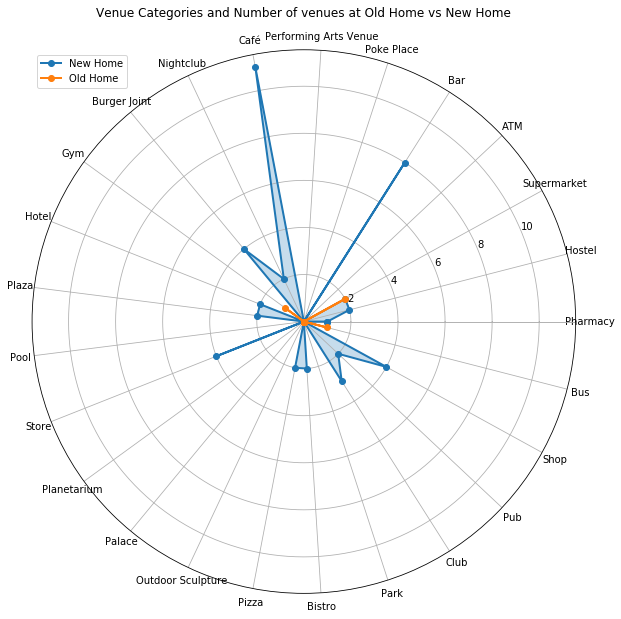

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

labels=Label_ON
stats1=top_districts_grouped.loc[1,labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats1=np.concatenate((stats1,[stats1[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats1, 'o-', linewidth=2, label='New Home')
ax.fill(angles, stats1, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)

stats2=top_districts_grouped.loc[2,labels].values
stats2=np.concatenate((stats2,[stats2[0]]))

ax.plot(angles, stats2, 'o-', linewidth=2, label='Old Home')
ax.fill(angles, stats2, alpha=0.25)

ax.legend(loc=2)
ax.set_title('Venue Categories and Number of venues at Old Home vs New Home')
ax.grid(True)

# A wordcloud for the top venue spot

In [ ]:
# Libraries
!conda install -c conda-forge wordcloud
from wordcloud import WordCloud

#import matplotlib.pyplot as plt
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from PIL import Image
#import matplotlib.pyplot as plt

Solving environment: \ 

In [ ]:
cluster_top = top_districts_grouped.iloc[[0]].drop('District', axis=1)
cluster_top.sort_values(0, axis=1, ascending=False, inplace=True, kind='quicksort', na_position='last')

cluster_top = cluster_top.loc[:, (cluster_top != 0).any(axis=0)]
Venues_top_dict = cluster_top[0:30].to_dict('records')
print(Venues_top_dict[0])

In [ ]:
wc = WordCloud(background_color="white",width=800,height=800, max_words=30,relative_scaling=0.4,normalize_plurals=False).generate_from_frequencies(Venues_top_dict[0])
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc)

# Trending venues around new home location

In [ ]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, new_latitude, new_longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

In [ ]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city',  'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [ ]:
# display trending venues
trending_venues_df

In [ ]:
#visualize trending spot
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[new_latitude, new_longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    folium.features.CircleMarker(
        [new_latitude, new_longitude],
        radius=10,
        popup='Ecco',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)

In [ ]:
# display map
venues_map

In [ ]:
newhome_venues = munich_venues[(munich_venues['District'] == 'New Home')]
newhome_venues_count = newhome_venues['Venue Category'].value_counts() #type series
newhome_venues_count = newhome_venues_count.reset_index() # type dataframe
newhome_venues_count.columns = ['Venue Category', 'Venue Counts']
print(newhome_venues_count.shape)
newhome_venues_count.head(30)

In [ ]:
newhome_venues = newhome_venues.reset_index(drop=True)
newhome_venues.head()

In [ ]:
newhome_venues.drop(['District','District Latitude','District Longitude'], axis=1, inplace=True )  !!! run with 1st run only
newhome_venues = newhome_venues.sort_values(["Venue Category","Venue"])
newhome_venues = newhome_venues.reset_index(drop=True)
newhome_venues.head()


In [ ]:
## print report of all venues per category 

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD+ "Report of all venues in FourSquare within 750 of new home location - sorted by category in aphabetical order"+ color.END) 
count = 0
for lat, lng,  venue, vencat in zip(newhome_venues['Venue Latitude'][0:97], newhome_venues['Venue Longitude'][0:97], newhome_venues['Venue'][0:97],newhome_venues['Venue Category'][0:97]) : 
    count = count + 1   
    vencat = vencat[:25]   
    print (count, venue," --", vencat)

In [ ]:
#Create map of the new home location with all the venues within 750m

map_newhome = folium.Map(location=[new_latitude, new_longitude], zoom_start=15)

#create plots on map   
for lat, lng,  venue, vencat in zip(newhome_venues['Venue Latitude'][0:97], newhome_venues['Venue Longitude'][0:97], newhome_venues['Venue'][0:97],newhome_venues['Venue Category'][0:97]) : 
    venuelabel = venue + ' ' + vencat
    label = '{}'.format(venuelabel)
    label = folium.Popup(label, parse_html=True)
    
#  #Seperate colours for the 3 categories of high, medium and low rentals
    if vencat == "Café":
        grpcolor =  'red'
        fillcol = 'red'
    elif vencat == "Bar":
         grpcolor =  'blue' 
         fillcol = 'blue'   
    elif vencat == "Italian Restaurant":
        grpcolor = 'green'
        fillcol = 'green'
    elif vencat == "Burger Joint":
        grpcolor = 'brown'
        fillcol = 'brown'
    elif vencat == "Pub":
        grpcolor = 'black'
        fillcol = 'black'
    elif vencat == "Beer Bar":
        grpcolor = 'orange'
        fillcol = 'orange'    
    else: 
        grpcolor = 'yellow'
        fillcol = 'yellow'
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color=grpcolor,
        fill=True,
        fill_color = fillcol,
 #       fill_color='#FF0000',
        fill_opacity=1,
        parse_html=False).add_to(map_newhome) 


In [ ]:
# add pin for new home location
label = '{}'.format('New Home')
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
   [new_latitude,new_longitude],
    radius=4,
    popup=label,
    color='black',
    fill=True,
    fill_color='White',
    fill_opacity=1,
    parse_html=False).add_to(map_newhome) 


In [ ]:
map_newhome